# Valeurs nutritionnelles des burgers de McDonald's

## Analyse exploratoire

Le jeu de données contient les informations nutritionnelles pour 33 produits McDonald's. Ces informations proviennent toutes du site officiel français (données récupérées le 26 janvier 2025).

Chaque ligne correspond à un produit et les colonnes représentent les valeurs nutritionnelles pour 100 g :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mcdonalds-valeurs-nutritionnelles.csv", index_col='nom_burger')
print(df.shape)
df.head()

(33, 8)


,lipides_100g,acides_gras_satures_100g,glucides_100g,sucres_100g,fibres_100g,proteines_100g,sel_100g,calories_100g
nom_burger,,,,,,,,
Le Double Big Mac™,14.0,5.3,14,2.6,1.3,14.0,0.86,241
McExtreme - 1 Steak Haché,21.0,7.4,15,3.6,0.9,17.0,1.10,319
McExtreme - 2 Steaks Hachés,21.0,8.0,11,2.5,0.7,19.0,0.91,310
Les Veggie McPlant® Nuggets,16.0,1.5,21,0.9,4.1,13.0,1.10,287
Le McVeggie®,8.2,0.9,23,3.7,3.3,8.7,8.00,207


Le jeu de données est propre et ne contient pas de valeurs manquantes :

In [ ]:
df.isnull().sum()

,0
lipides_100g,0
acides_gras_satures_100g,0
glucides_100g,0
sucres_100g,0
fibres_100g,0
proteines_100g,0
sel_100g,0
calories_100g,0


Pour mieux comprendre le jeu de données, examinons sa structure et quelques statistiques sommaires :

In [ ]:
df.describe()

,lipides_100g,acides_gras_satures_100g,glucides_100g,sucres_100g,fibres_100g,proteines_100g,sel_100g,calories_100g
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,11.742424,3.730303,21.212121,3.481818,1.624242,12.193939,1.304242,242.000000
std,3.367216,2.078684,5.395354,1.574495,0.679628,2.898592,1.221232,28.115832
min,6.500000,0.800000,10.000000,0.400000,0.700000,6.700000,0.670000,202.000000
25%,9.100000,1.900000,18.000000,2.300000,1.300000,10.000000,0.990000,224.000000
50%,11.000000,3.300000,21.000000,3.500000,1.500000,12.000000,1.100000,241.000000
75%,14.000000,5.400000,25.000000,4.700000,1.800000,14.000000,1.200000,253.000000
max,21.000000,8.000000,32.000000,6.400000,4.100000,19.000000,8.000000,319.000000


Les 33 produits varient fortement en termes de teneur en lipides et calories.
- Le nombre moyen de calories pour 100 g est de 242 kcal.
- Le nombre moyen de lipides pour 100 g est de 11,7 g avec 3,7 g d'acides gras saturés.

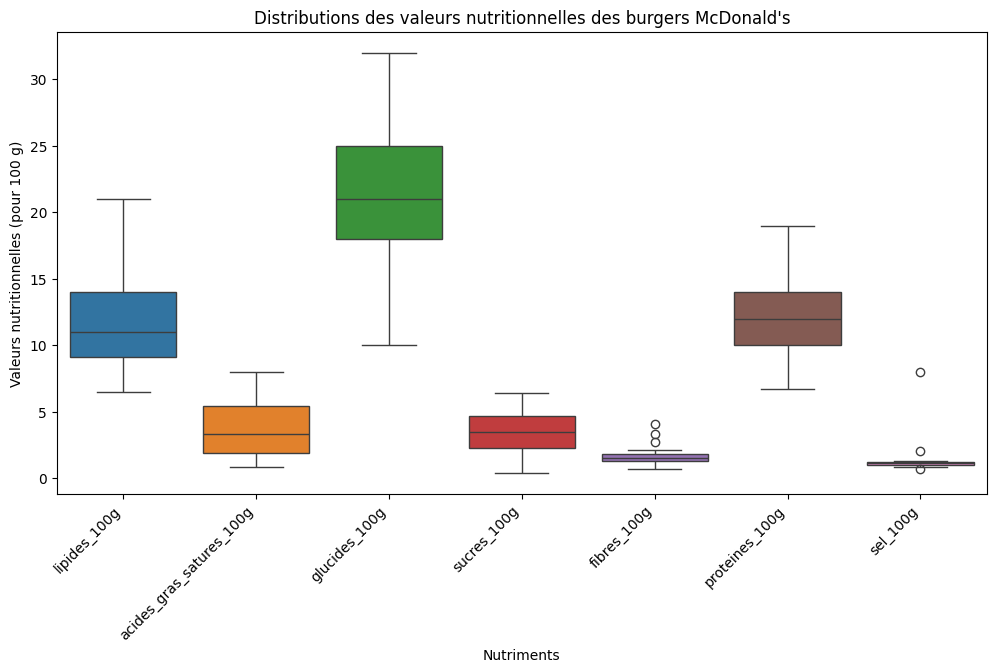

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['calories_100g']))
plt.title("Distributions des valeurs nutritionnelles des burgers McDonald's")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Valeurs nutritionnelles (pour 100 g)")
plt.xlabel("Nutriments")
plt.show()

Les burgers de McDonald's sont particulièrement riches en glucides, ce qui reflète leur densité énergétique. Les fibres sont présentes en faibles quantités.

Analyse des burgers les plus et les moins caloriques :

In [ ]:
print(df['calories_100g'].idxmax())
print(df['calories_100g'].idxmin())

McExtreme - 1 Steak Haché
Le Egg & Cheese McMuffin®


In [ ]:
df[df['calories_100g'] < 210]

,lipides_100g,acides_gras_satures_100g,glucides_100g,sucres_100g,fibres_100g,proteines_100g,sel_100g,calories_100g
nom_burger,,,,,,,,
Le McVeggie®,8.2,0.9,23,3.7,3.3,8.7,8.00,207
Le McWrap® Veggie,9.0,2.1,21,2.3,2.7,8.3,1.20,204
Le Egg & Cheese McMuffin®,7.7,3.2,20,1.6,1.5,12.0,0.88,202
Le Egg & Bacon McMuffin®,8.4,3.4,20,1.6,1.5,13.0,0.92,208


4 burgers ont moins de 210 kcal pour 100 g : Le McVeggie®, Le McWrap® Veggie, Le Egg & Cheese McMuffin® et Le Egg & Bacon McMuffin®.

Analyse des burgers les plus et les moins riches en lipides :

In [ ]:
print(df['lipides_100g'].idxmax())
print(df['lipides_100g'].idxmin())

McExtreme - 1 Steak Haché
Le McFish™


Le McExtreme - 1 Steak Haché est le burger le plus calorique pour 100 g avec 319 kcal. C'est aussi le burger qui contient le plus de lipides pour 100 g.
Le Egg & Cheese McMuffin® est le burger le moins calorique pour 100 g avec 202 kcal.

Analyse des burgers les plus riches en protéines et en fibres :

In [ ]:
print(df['proteines_100g'].idxmax())
print(df['fibres_100g'].idxmax())

McExtreme - 2 Steaks Hachés
Les Veggie McPlant® Nuggets


Les Veggie McPlant® Nuggets" semblent avoir une teneur intéressante en fibres (4,1 g/100 g) contre 1,6 g en moyenne.

Visualisons les corrélations entre les colonnes nutritionnelles à l'aide d'une *heatmap* :

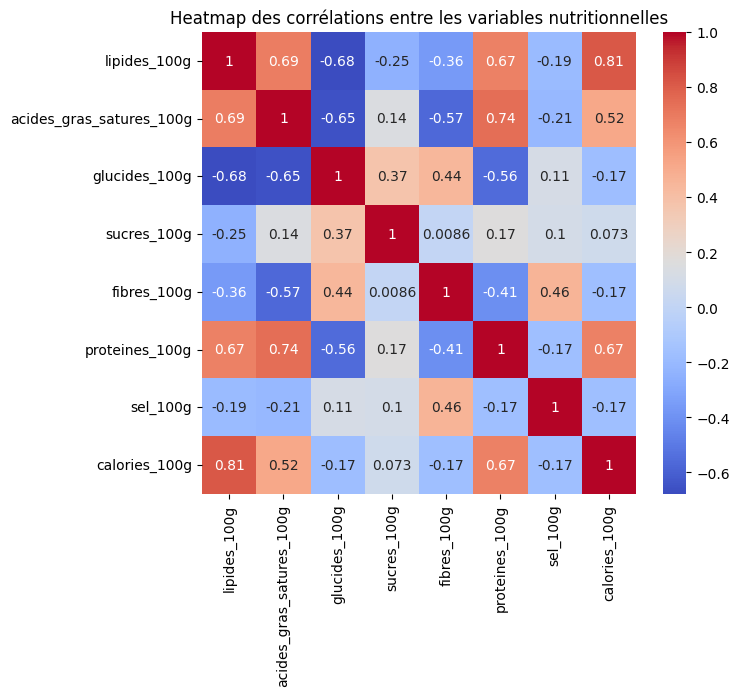

In [ ]:
plt.figure(figsize=(7, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap des corrélations entre les variables nutritionnelles")
plt.show()

Analyse sommaire :
- Les calories sont fortement corrélées avec les lipides ($r = 0,81$) et les protéines ($r = 0,67$). Les burgers riches en lipides et protéines ont donc généralement une valeur calorique plus élevée.
- Les lipides et les acides gras saturés montrent également une forte corrélation positive ($r = 0,69$). Notons que les acides gras saturés sont un type de lipides.
- En revanche, les fibres ont une corrélation négative notable avec les lipides (`$r = -0,36$) et les acides gras saturés ($r = -0,57$) qui pourrait refléter une relation inverse entre les aliments riches en fibres et en graisses.

On peut utiliser Seaborn pour tracer le graphe de régression linéaire qui montre la relation entre la teneur en lipides et le nombre de calories :

<Axes: xlabel='lipides_100g', ylabel='calories_100g'>

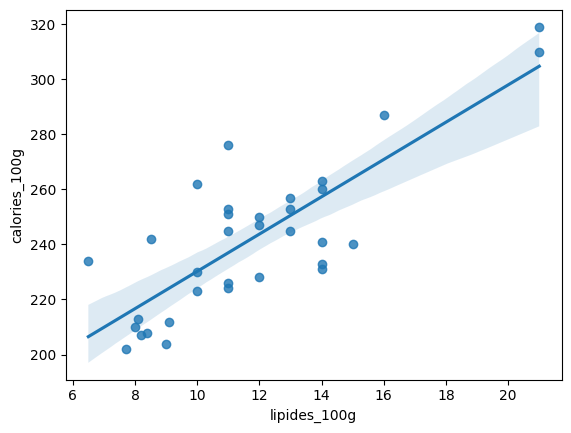

In [ ]:
sns.regplot(data=df,x='lipides_100g',y='calories_100g')

## Modèle de régression linéaire multivariée

Pour calculer les **calories totales** d'un aliment à partir de sa teneur en protéines, lipides et glucides, on utilise les valeurs caloriques suivantes :

- **1 g de protéines = 4 kcal**  
- **1 g de glucides = 4 kcal**  
- **1 g de lipides = 9 kcal**  

Nous allons tenter de reconstituer cette formule à l'aide d'un modèle de régression linéaire multivariée.

Pour cela, nous allons utiliser les variables `lipides_100g`, `glucides_100g` et `proteines_100g` comme prédicteurs pour prédire les calories.

### Étape 1 : Préparation des données

Nous séparons les données en *features* (`X`) et en variable cible (`y`). Ensuite, nous allons diviser les données en ensembles d'entraînement et de test :

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['lipides_100g', 'glucides_100g', 'proteines_100g']]
y = df['calories_100g']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Étape 2 : Construction du modèle

Nous utilisons le module `LinearRegression` de Scikit-learn pour entraîner un modèle sur les données d'entraînement :

In [ ]:
from sklearn.linear_model import LinearRegression

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prédictions sur les données de test
y_pred = model.predict(X_test)

### Étape 3 : Évaluation du modèle

Nous calculons les métriques de performance ($R^2$ et erreur quadratique moyenne) pour évaluer la qualité des prédictions :

In [ ]:
# Évaluation du modèle
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Évaluation du modèle:")
print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Coefficient de détermination (R²) : {r2:.2f}")

Évaluation du modèle:
Erreur quadratique moyenne (MSE) : 9.13
Coefficient de détermination (R²) : 0.97


Le coefficient de détermination ($R^2$) est de 0,97, indiquant que 97 % de la variance des calories est expliquée par les prédicteurs.

Affichons les coefficients :

In [ ]:
print(model.coef_)

[9.18602474 4.0418253  3.43468794]


Ces valeurs sont proches des coefficients caloriques théoriques (9 pour les lipides, 4 pour les glucides et les protéines), ce qui confirme la validité du modèle.